# Linear Regression

use Scikit-learn to perform a basic,
unvalidated linear regression on the sample of 10 dogs. We pull in this data
using Pandas, convert it into NumPy arrays, perform linear regression using
Scikit-learn, and use plotly to display it in a chart.

m = [1.93939394]
b = [4.73333333]


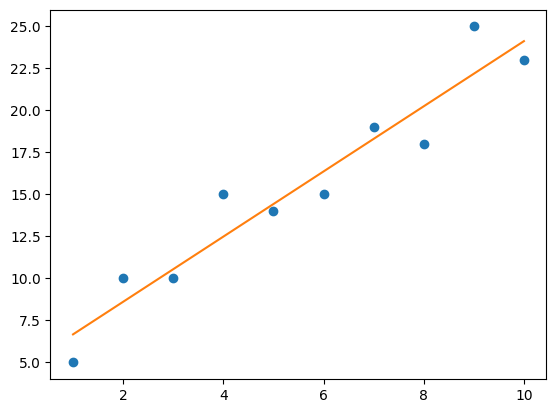

In [3]:
#Using Scikit-learn to do a linear regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)
Y = df.values[:, -1]
# Fit a line to the points
fit = LinearRegression().fit(X, Y)
# m = 1.7867224, b = -16.51923513
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))
# show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b) # line
plt.show()

In [5]:
# Calculating the residuals for a given line and data
import pandas as pd
# Import points
points = pd.read_csv('https://bit.ly/3goOAnt',
delimiter=",").itertuples()
# Test with a given line
m = 1.93939
b = 4.73333
# calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict
    print(residual)

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


In [7]:
#Calculating the sum of squares for a given line and data
import pandas as pd
# Import points
points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()
# Test with a given line
m = 1.93939
b = 4.73333
sum_of_squares = 0.0
# calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_predict - y_actual)**2
    sum_of_squares += residual_squared
    print("sum of squares = {}".format(sum_of_squares))
# sum of squares = 28.096969704500005

sum of squares = 2.7979921984
sum of squares = 4.7242308505000015
sum of squares = 5.028383100500002
sum of squares = 11.3240160926
sum of squares = 11.509156971000001
sum of squares = 13.3851528799
sum of squares = 13.862550963500002
sum of squares = 18.918078365999996
sum of squares = 26.82632223160001
sum of squares = 28.096969704500005


In [9]:
#Calculating m and b for a simple linear regression
import pandas as pd
# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd',
delimiter=",").itertuples())
n = len(points)
m = (n*sum(p.x*p.y for p in points) - sum(p.x for p in points) *
sum(p.y for p in points)) / (n*sum(p.x**2 for p in points) -
sum(p.x for p in points)**2)
b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) /n
print(m, b)
# 1.9393939393939394 4.7333333333333325

1.9393939393939394 4.7333333333333325


In [10]:
#Using inverse and transposed matrices to fit a linear regression
import pandas as pd
from numpy.linalg import inv
import numpy as np
# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()
# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T
# Extract output column (all rows, last column)
Y = df.values[:, -1]
# Calculate coefficents for slope and intercept
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(b) # [1.93939394 4.73333333]
# Predict against the y-values
y_predict = X_1.dot(b)

[1.93939394 4.73333333]


## Gradient descent

In [ ]:
#Performing gradient descent for a linear regression
import pandas as pd
# Import points from CSV
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
# Building the model
m = 0.0
b = 0.0
# The learning Rate
L = .001
# The number of iterations
iterations = 100_000
n = float(len(points)) # Number of elements in X
# Perform Gradient Descent
for i in range(iterations):
    # slope with respect to m
    D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)
    # slope with respect to b
    D_b = sum(2 * ((m * p.x + b) - p.y) for p in points)
    # update m and b
    m -= L * D_m
    b -= L * D_b

print("y = {0}x + {1}".format(m, b))
# y = 1.9393939393939548x + 4.733333333333227

y = 2.0140000000000002x + 0.308
y = 2.44334x + 0.3883
y = 2.5332552x + 0.4197666
y = 2.5504743700000003x + 0.440713196
y = 2.55213065354x + 0.4593467513799999
y = 2.5504619076623998x + 0.47742544446299995
y = 2.548089439871422x + 0.495326125730876
y = 2.545574697340031x + 0.5131297648304021
y = 2.543037906256863x + 0.5308539528263906
y = 2.5405047836281756x + 0.5485027040816078
y = 2.5379808027855035x + 0.5660771238008764
y = 2.5354671010225696x + 0.5835776930184534
y = 2.532963887003161x + 0.6010047580456017
y = 2.530471170625711x + 0.618358635314342
y = 2.527988919359336x + 0.635639633839227
y = 2.5255170917303325x + 0.6528480600329155
y = 2.5230556444943555x + 0.6699842187419206
y = 2.5206045341720906x + 0.6870484134727031
y = 2.5181637173775835x + 0.704040946444319
y = 2.5157331508879692x + 0.7209621186038985
y = 2.513312791657804x + 0.7378122296341438
y = 2.510902596821539x + 0.7545915779591025
y = 2.5085025236934526x + 0.7713004607495512
y = 2.5061125297670435x + 0.78793917392828

KeyboardInterrupt: 

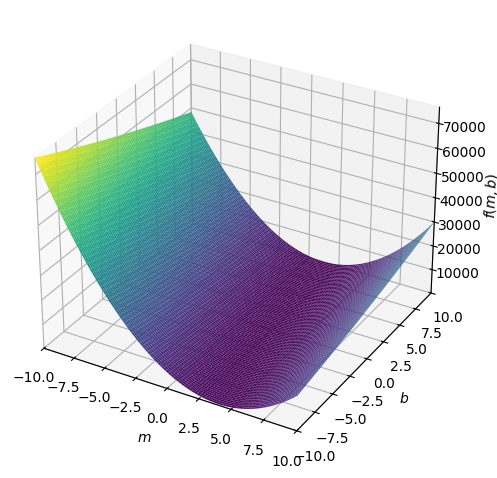

: 

In [ ]:
# loss function looks like for this simple linear regression
from sympy import *
from sympy.plotting import plot3d
import pandas as pd
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)
sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n)) \
.subs(n, len(points) - 1).doit() \
.replace(x, lambda i: points[i].x) \
.replace(y, lambda i: points[i].y)
plot3d(sum_of_squares)